**Implementation of stochastic and batch grandient descent in pythonImplementation of stochastic and batch grandient descent in python**

We will use very simple home prices data set to implement batch and stochastic gradient descent in python. Batch gradient descent uses all training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties. In stochastic GD, we randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights. So the key difference here is that to adjust weights batch GD will use all training samples where as stochastic GD will use one randomly picked training sample

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv("/home/milan/Desktop/DeepLearning/homeprices_banglore.txt")
df.head()
df.sample(5)

,area,bedrooms,price
7,3300,4,155.0
13,1100,2,40.0
9,3700,5,167.0
8,1310,3,50.0
6,2732,4,135.0


In [20]:
df.shape

(20, 3)

In [21]:
df.shape[1]

3

In [22]:
df.drop('price',axis='columns')

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


**Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them**

In [23]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price',axis='columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [24]:
scaled_y = sy.fit_transform(df['price'].values.reshape(-1, 1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [25]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [26]:
scaled_x.T           #converts columns into rows....

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [27]:
w = np.ones(shape=(2))
w

array([1., 1.])

In [28]:
#vector_operation
np.dot(w, scaled_x.T)       #w1*area + w2*bedrooms

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [29]:
a = np.array([1,2,3])
b = np.array([8,6,7])
a-b

array([-7, -4, -4])

In [30]:
np.mean(np.square(a-b))

27.0

**We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D**

In [31]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

**Gradient descent allows you to find weights (w1,w2,w3) and bias in following linear equation for housing price prediction
**

In [32]:
def batch_GD(x, y_true, epochs, learning_rate=0.01):
    
    no_of_features = x.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    
    w = np.ones(shape=(no_of_features))
    b = 0
    total_samples = x.shape[0]    # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, scaled_x.T) + b
        
        wd = -(2/total_samples)*(x.T.dot(y_true - y_predicted))
        bd = -(2/total_samples)*np.sum(y_true - y_predicted)
        
        w = w - learning_rate*wd
        b = b - learning_rate*bd
        
        cost = np.mean(np.square(y_true - y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_GD(scaled_x, scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

**Check price equation above. In that equation we were trying to find values of w1,w2 and bias. Here we got these values for each of them,
w1 = 0.66469087 w2 = 0.60541671 bias = -0.17792104056392882**

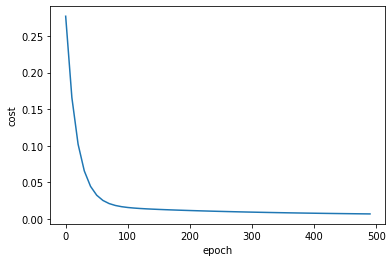

In [33]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [34]:
sx.transform([[2600,4]])

array([[0.62068966, 0.75      ]])

In [35]:
w

array([0.70712464, 0.67456527])

In [36]:
sy.inverse_transform([[1,0.5,0]])

array([[167. ,  99.5,  32. ]])

In [37]:
def predict(area, bedrooms, w, b):
    scaled_x = sx.transform([[area,bedrooms]])[0]
    
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]
    
predict(2600, 4, w,b)

128.45484403267596

In [38]:
predict(1000,2,w,b)

30.253094462442355

In [39]:
predict(1500,3,w,b)

69.47860785714694

**(2) Stochastic Gradient Descent Implementation**

Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [40]:
import random
random.randint(0,6)

6

In [41]:
def stochastic_GD(x, y_true, epochs, learning_rate=0.01):
    
    no_of_features = x.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    
    w = np.ones(shape=(no_of_features))
    b = 0
    total_samples = x.shape[0]    # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b
        
        wd = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
        bd = -(2/total_samples)*(sample_y - y_predicted)
        
        w = w - learning_rate*wd
        b = b - learning_rate*bd
        
        cost = np.square(sample_y - y_predicted)
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_GD(scaled_x, scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.7039126 , 0.67357943]), -0.22722683878811897, 0.002412423699018728)

In [42]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

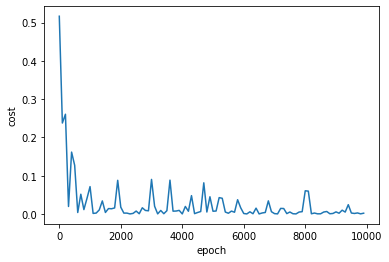

In [43]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [44]:
predict(2600,4,w_sgd, b_sgd)

128.50731497135456

In [45]:
predict(1000,2,w_sgd, b_sgd)

30.611351423829525

In [46]:
predict(1500,3,w_sgd, b_sgd)


69.72882964082358

In [47]:
import random
for i in range(10):
	n = random.randrange(0,19)
	a = n
    
	print(a)

17
5
17
16
15
6
5
15
6
4


**(3) Mini-Batch Gradient Descent Implementation**

In [50]:
total_samples = 20
batch_size = 5
x = scaled_x
y_true = scaled_y.reshape(scaled_y.shape[0],)
random_indices = np.random.permutation(total_samples)
X_tmp = x[random_indices]
y_tmp = y_true[random_indices]

for j in range(0,total_samples,batch_size):
    Xj = X_tmp[j:j+batch_size]
    yj = y_tmp[j:j+batch_size]
    print(j)

0
5
10
15


In [62]:
def miniBatch_GD(x, y_true, epochs, batch_size,learning_rate=0.01):
    
    no_of_features = x.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    
    w = np.ones(shape=(no_of_features))
    b = 0
    total_samples = x.shape[0]    # number of rows in X
    
    if batch_size > total_samples:
        batch_size = total_samples
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = x[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            Yj = y_tmp[j:j+batch_size]

            y_predicted = np.dot(w, Xj.T) + b

            wd = -(2/len(Xj))*(Xj.T.dot(Yj - y_predicted))
            bd = -(2/len(Xj))*np.sum((Yj - y_predicted))

            w = w - learning_rate*wd
            b = b - learning_rate*bd

            cost = np.mean(np.square(Yj - y_predicted))

            if i%10==0:
                cost_list.append(cost)
                epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_mgd, b_mgd, cost_mgd, cost_list_mgd, epoch_list_mgd = miniBatch_GD(scaled_x, scaled_y.reshape(scaled_y.shape[0],),120, 5)
w_mgd, b_mgd, cost_mgd
            

(array([0.71017014, 0.67816396]), -0.23331488747920398, 0.00444127807792691)

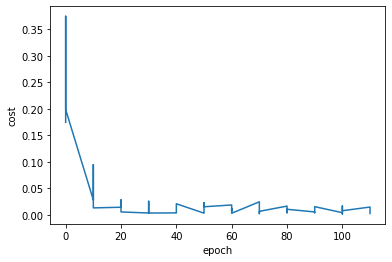

In [63]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mgd,cost_list_mgd)

In [64]:
def predict(area,bedrooms,w,b):
    scaled_x = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_x[0] + w[1] * scaled_x[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

128.45484403267596

In [65]:
predict(1000,2,w,b)

30.253094462442355

In [66]:
predict(1500,3,w,b)

69.47860785714694